# **Stage 1 : Breast cancer dataset**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

## **Data pre-processing** 

Viewing the dataset

In [16]:
df = pd.read_csv(r'C:\Users\ngera\OneDrive\Documents\archive\breast-cancer.csv')
#df = pd.read_csv('breast-cancer.csv')
#display the first 5 lines of the DataFrame to understand its structure 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# Removal of the ‘id’ column from the DataFrame. 
# The ‘id’ column is often a unique key or identifier that doesn't provide any relevant information for analysis or modelling.
df.drop(columns=['id'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

The DataFrame contains 569 rows and 31 columns.
This suggests that it is a relatively small dataset.
None of the columns contains missing values. The Non-Null Count for each column is 569, i.e. all entries.
The diagnosis column is the target variable for the analysis, indicating whether a tumour is benign or malignant.

In [19]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Visualisation of characteristic distributions by tumour type

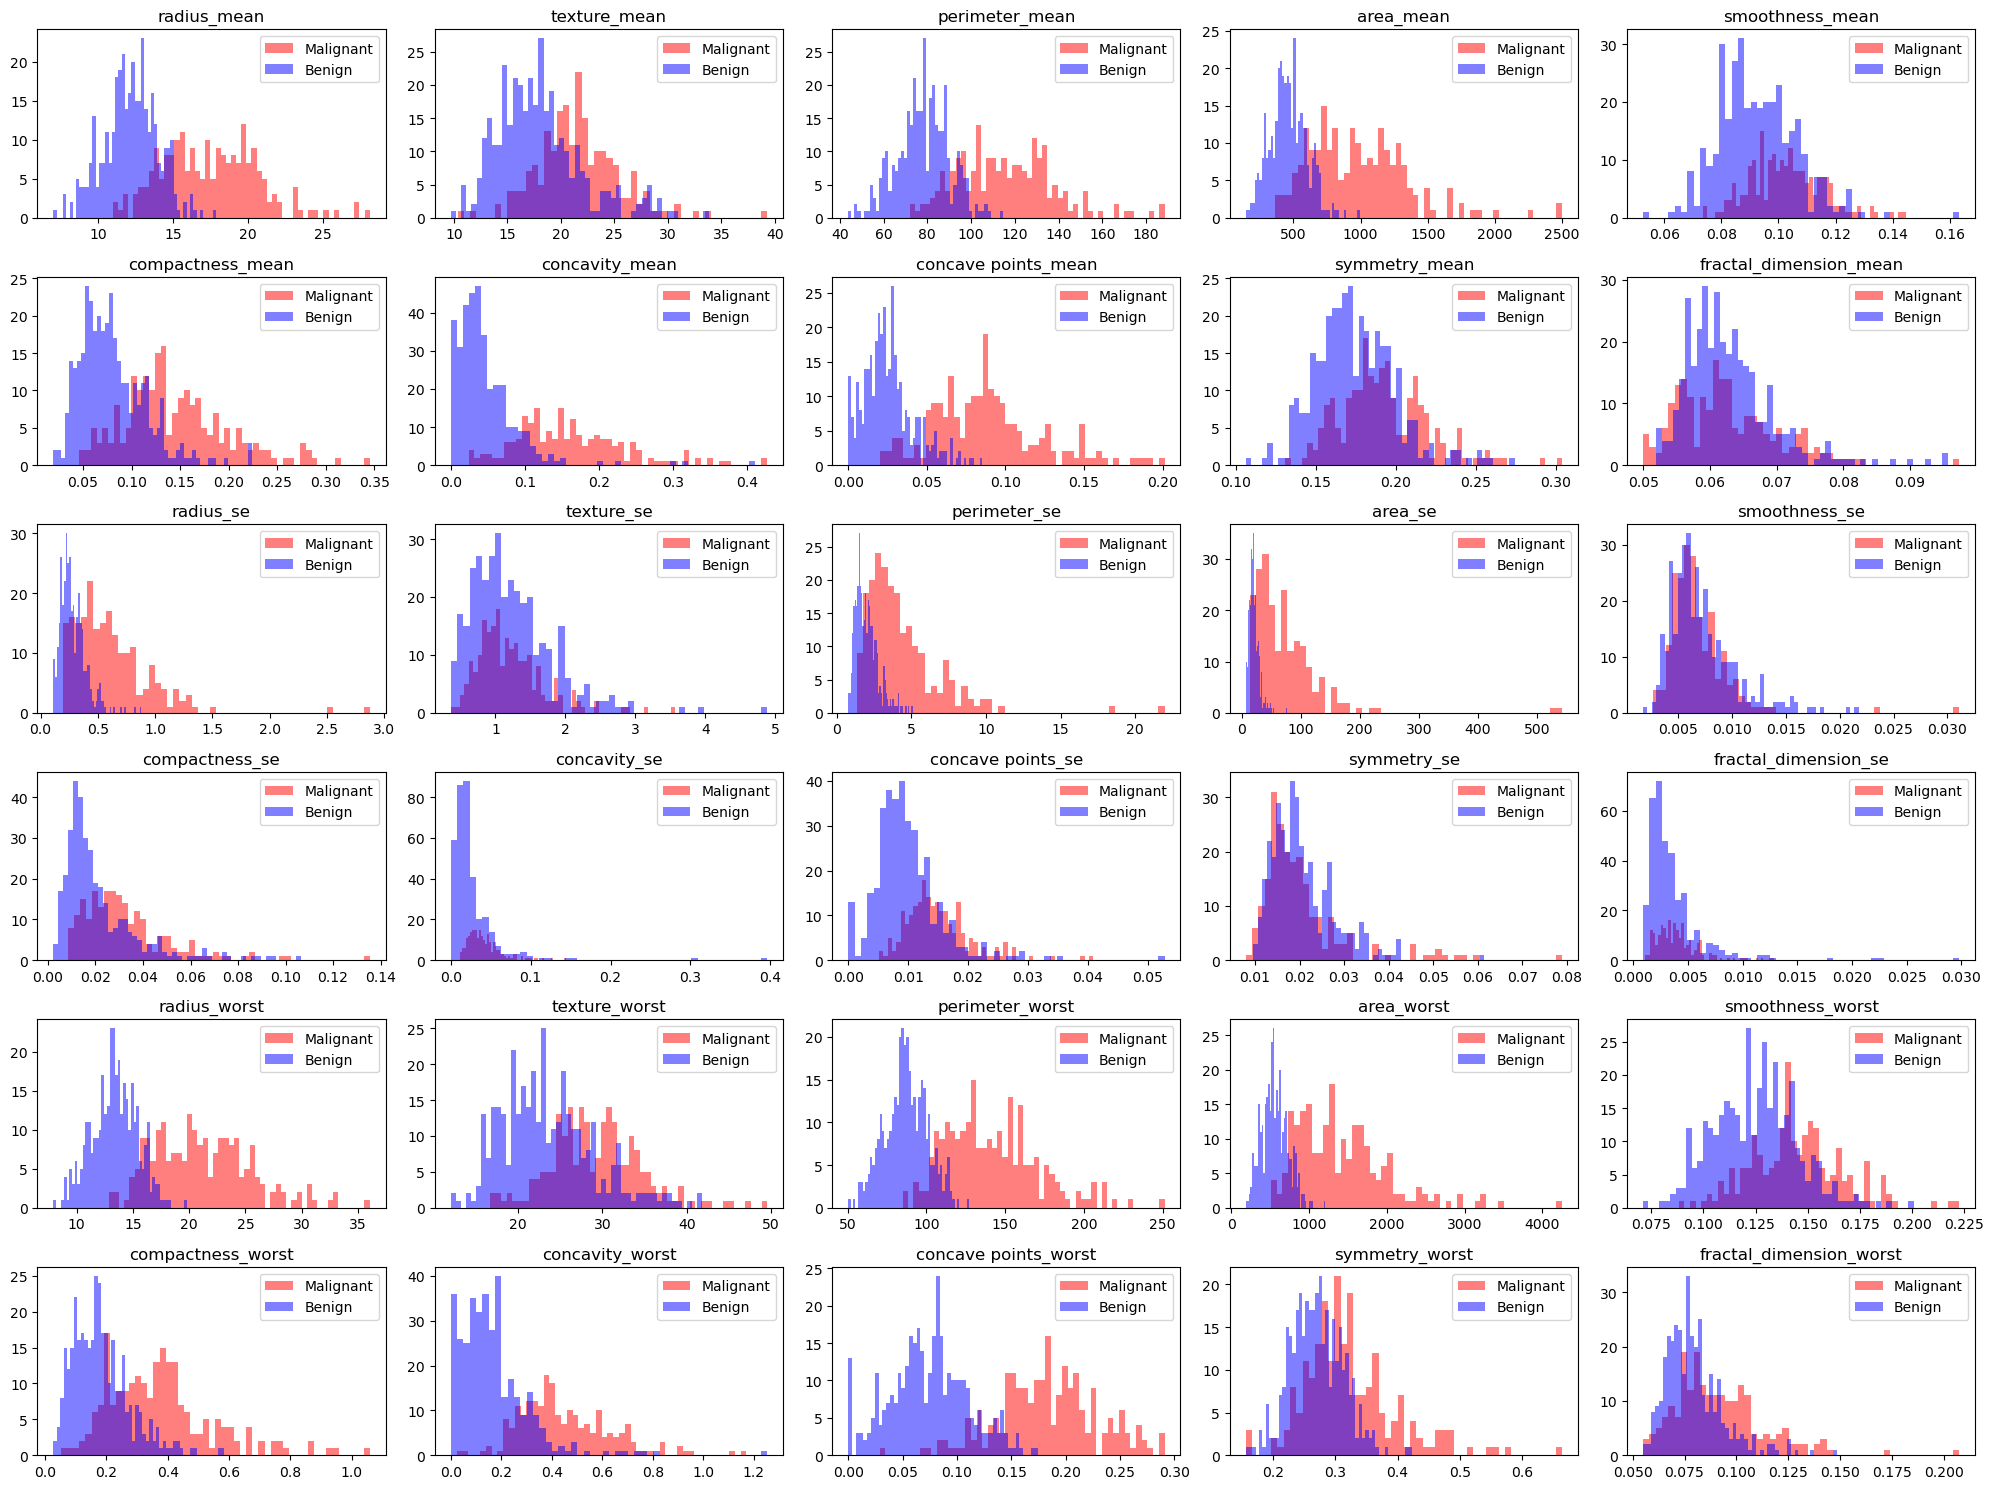

In [20]:
# Definition of a dictionary to assign a colour to each type of tumour 
# ‘M’ (Malignant) will be in red and ‘B’ (Benign) in blue.
colors = {'M': 'red', 'B': 'blue'}


malignant_data = df[df['diagnosis'] == 'M']
benign_data = df[df['diagnosis'] == 'B']

feature_columns = df.drop(columns=[ 'diagnosis']).columns
plt.figure(figsize=(20, 15))


for i, column in enumerate(feature_columns, 1):

    plt.subplot(6, 5, i)
    plt.hist(malignant_data[column], bins=50, color='red', alpha=0.5, label='Malignant')
    plt.hist(benign_data[column], bins=50, color='blue', alpha=0.5, label='Benign')
    # Title of the subgraph corresponding to the name of the feature analysed.
    plt.title(column)
    plt.legend(loc='upper right')


plt.tight_layout()
plt.show()


In [21]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In this step, we decide to remove two columns from the dataset: smoothness_mean and symmetry_mean.
The histograms show that the distributions of smoothness_mean values for malignant (red) and benign (blue) tumours are very similar.
The mean for benign tumours is 0.092 compared to 0.103 for malignant tumours, which represents a very small difference.
This suggests that this characteristic does not make a significant distinction between the two types of tumour.
Similarly, for symmetry_mean, the distributions of the two classes overlap strongly, and the means are also close (0.174 for benign versus 0.193 for malignant).
This indicates that this characteristic does not contribute sufficiently to differentiating the two classes.

Why delete certain columns?  
By removing uninformative columns, we simplify the dataset while reducing noise. This can improve the performance of machine learning models by focusing on the most discriminating features.

In [22]:
df.drop(columns=['smoothness_mean'], inplace=True)

In [23]:
df.drop(columns=['symmetry_mean'], inplace=True)

In [24]:
# Calculation of the percentage distribution of values in the ‘diagnosis’ column.
df['diagnosis'].value_counts(normalize=True) * 100

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

The results show the following proportion for the two classes in the diagnosis column:B (Benign): 62.74% of samples and M (Malignant): 37.26% of samples.
This distribution indicates a moderate imbalance between the two classes, with a predominance of benign samples.
Because of this imbalance, classification models may tend to favour the majority class (B) in order to optimise global metrics such as accuracy.
This could mask prediction errors on the minority class (M), which is often the class of interest in this type of study (identifying malignant tumours).

In [25]:
#Transform the values in the diagnosis column into numerical values 
# This converts the target variable into a format that can be used to train machine learning models.
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

### Correlation matrix 

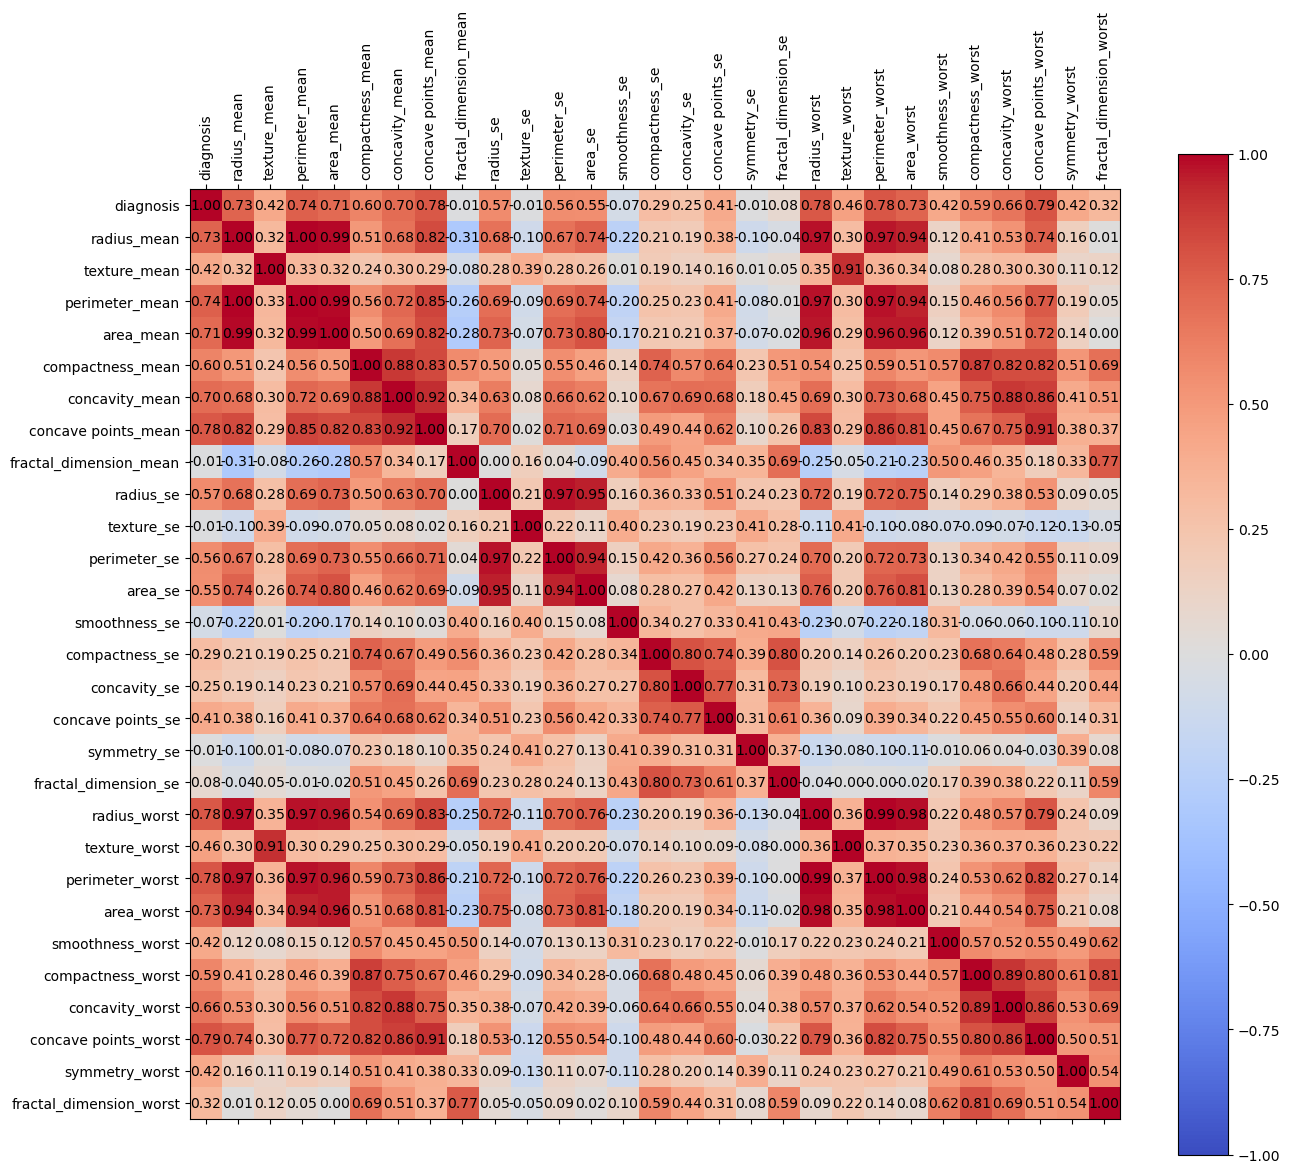

In [26]:
#This code is used to visualise the correlations between the different columns of the DataFrame in the form of a correlation matrix. 
#This allows you to explore the linear relationships between characteristics
correlations = df.corr()

# Creating the figure and axis
fig = plt.figure(figsize=(15, 13)) 
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='coolwarm') 

# Add colour bar
fig.colorbar(cax)

# Ticks configuration
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)

# Add the correlation values in each box
for i in range(len(correlations.columns)):
    for j in range(len(correlations.columns)):
        ax.text(j, i, f"{correlations.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()


The correlation matrix shows strong linear relationships (positive or negative) between several dataset characteristics. When certain columns are strongly correlated, they provide redundant information in the model. It is therefore better to remove them.

radius_mean, area_mean, radius_worst, area_worst, radius_se, area_se:
These columns are all highly correlated with each other (coefficients close to 0.9 or more).
For example, radius_mean is highly correlated with area_mean and perimeter_mean (which is logical). Keeping all these columns adds no value.

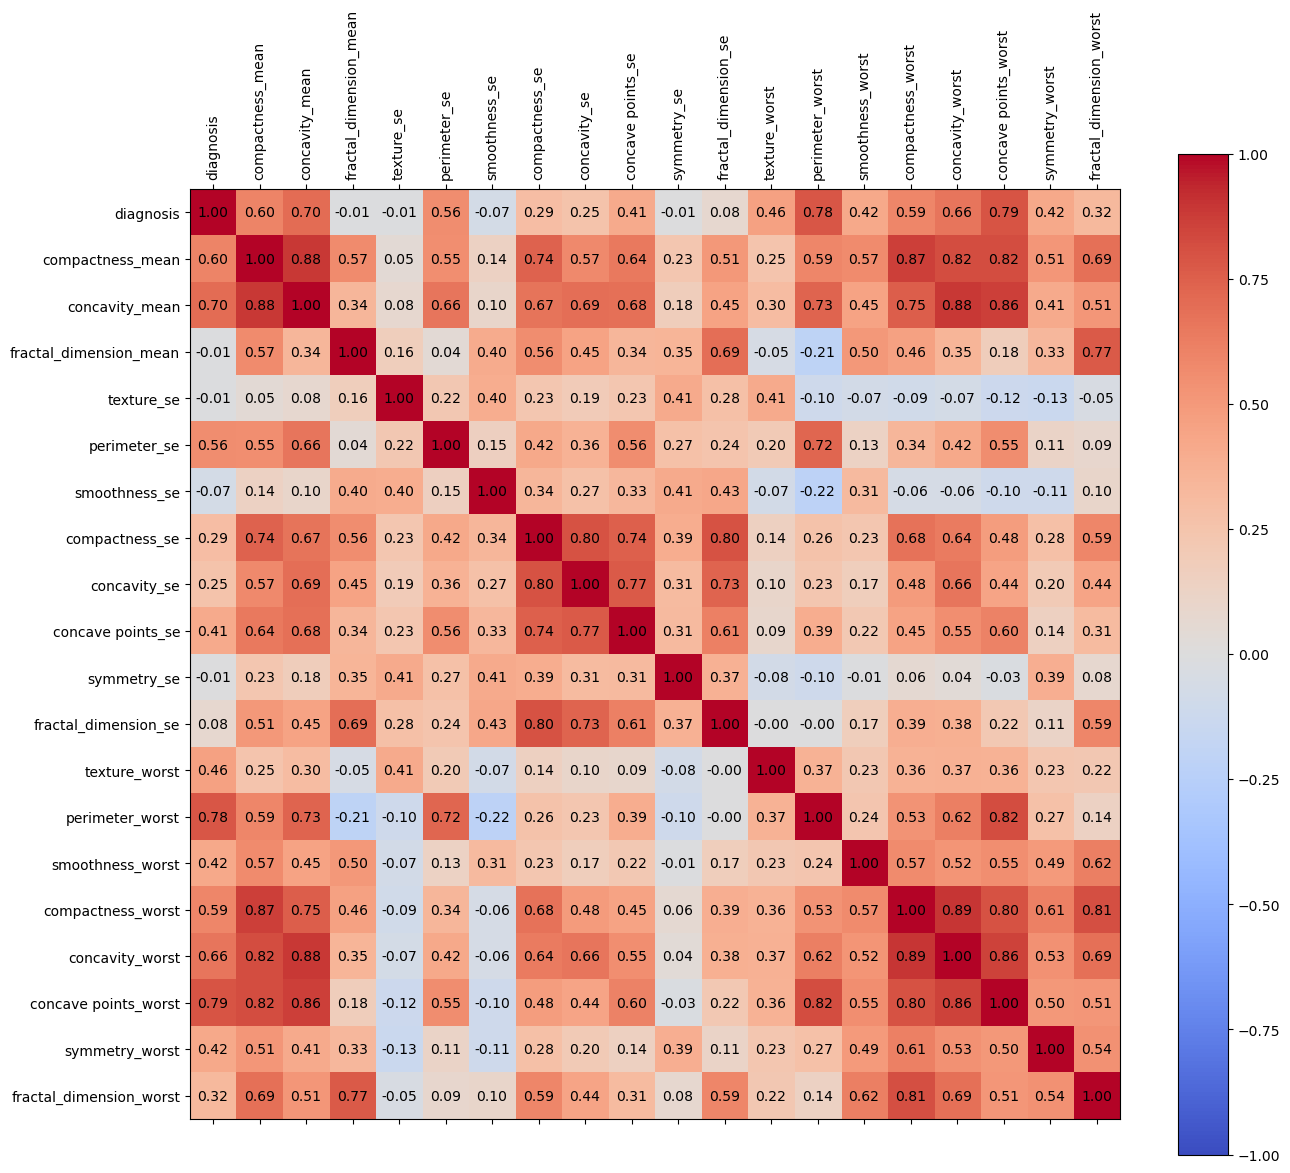

In [27]:
df.drop(columns=['radius_mean'], inplace=True)
df.drop(columns=['area_mean'], inplace=True)
df.drop(columns=['radius_worst'], inplace=True)
df.drop(columns=['area_worst'], inplace=True)
df.drop(columns=['radius_se'], inplace=True)
df.drop(columns=['area_se'], inplace=True)
df.drop(columns=['texture_mean'], inplace=True)
df.drop(columns=['perimeter_mean'], inplace=True)
df.drop(columns=['concave points_mean'], inplace=True)



correlations = df.corr()

fig = plt.figure(figsize=(15, 13))  
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='coolwarm') 

fig.colorbar(cax)

# Ticks configuration
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)

for i in range(len(correlations.columns)):
    for j in range(len(correlations.columns)):
        ax.text(j, i, f"{correlations.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()


## Data splitting on train/test datasets

### Creation of a pipeline for pre-processing and modelling

In [28]:
# Creation of the pipeline with the following steps: 
#1. scaler: Normalisation/Standardisation of data 
#2. PCA: Dimensionality reduction to 2 principal components 
#3. model: Machine learning model 
def MakePipeline(scaler,model):
  pip = make_pipeline(scaler, PCA(n_components=2), model)
  return pip

### Separation of data into explanatory and target variables

In [29]:
x=df.loc[:'fractal_dimension_worst']
y=df.loc[:, 'diagnosis']

In [30]:
## - test_size=0.33: 33% of the data will be used for testing, 67% for training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,
random_state=42)


## Implementation of algorithms and code quality

### Algorithm implementation: Random Forest with Pipeline

In [31]:
# Creation of a pipeline to integrate pre-processing (StandardScaler) and the model (Random Forest).
Pipeline = MakePipeline(StandardScaler(), RandomForestClassifier())
Pipeline.fit(x_train, y_train)
y_pred = Pipeline.predict(x_test)
# Calculates the accuracy of the model on the test set. 
# The score() method returns the correct proportion of predictions (accuracy).
test_acc = Pipeline.score(x_test, y_test)

### Evaluation of model performance

In [32]:
acc = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test,y_pred)
#Defines the percentage of correct predictions (all classes combined).
print("Accuracy:", acc)
#View errors by class.
print("Confusion Matrix:\n", confusion)
#Gives detailed metrics for each class
print("Classification Report:\n", classification_rep)

Accuracy: 0.9468085106382979
Confusion Matrix:
 [[114   7]
 [  3  64]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       121
           1       0.90      0.96      0.93        67

    accuracy                           0.95       188
   macro avg       0.94      0.95      0.94       188
weighted avg       0.95      0.95      0.95       188



The model showed excellent overall accuracy (94.68%), with very good performance in both classes.
It performs particularly well in identifying malignant tumours, with a recall of 96%, which is crucial for minimising false negatives.

## Hyperparameters optimisation

In [38]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to be tested
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'randomforestclassifier__max_depth': [None, 10, 20, 30],  # Maximum tree depth
    'randomforestclassifier__min_samples_split': [2, 5, 10], # Minimum number of samples to divide a node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples in a sheet
}

# Pipeline creation
Pipeline = MakePipeline(StandardScaler(), RandomForestClassifier(random_state=42))

# Configuring GridSearchCV
grid_search = GridSearchCV(
    estimator=Pipeline,       # Pipeline to be optimised
    param_grid=param_grid,    # Grid of hyperparameters
    scoring='accuracy',       # Metric used to assess performance
    cv=5,                     # 5-fold cross-validation
    verbose=2,                
    n_jobs=-1                 
)

# Running GridSearchCV on the drive assembly
grid_search.fit(x_train, y_train)

# Best hyperparameters found
print("Best hyperparameters : ", grid_search.best_params_)

# Better precision obtained during the search
print("best precision (CV) : ", grid_search.best_score_)

# Evaluation on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)

print("Test set accuracy : ", test_acc)
print("Classification Report :\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters :  {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}
best precision (CV) :  0.9605604921394395
Test set accuracy :  0.9414893617021277
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       121
           1       0.90      0.94      0.92        67

    accuracy                           0.94       188
   macro avg       0.93      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188



**Best hyperparameters found**  
max_depth: None  
Trees are not limited in depth, allowing the model to fully explore relationships in the data.  
min_samples_leaf: 4  
Each leaf (terminal node) must contain at least 4 samples.  
This constraint reduces the risk of overfitting by avoiding leaves that are too small.  
min_samples_split: 2  
A node must contain at least 2 samples to be split.  
This parameter is the default, which shows that it does not need to be adjusted for this problem.  
n_estimators: 50  
The model uses 50 trees, a choice that offers a good compromise between performance and calculation time.  
A higher number of trees could slightly improve accuracy but would increase computational cost.

**Comparison with the non-optimised model**  
Before optimisation:  
Accuracy on the test set: 94.68% (Random Forest with default parameters).  
The non-optimised model was already performing well but used more trees and potentially smaller leaves, which increased the risk of overfitting.  
After optimisation:  
Accuracy is similar (~94.15%), but the model **uses fewer trees** (50 versus 100 or more by default), reducing complexity and computation time.  
Additional regularisation via min_samples_leaf improves the robustness of the model.  

## Monitoring of Under-/Over-Fitting

### Cross-validation

Cross-validation is an essential method for evaluating the performance of a model in a robust way and for detecting underfitting and overfitting problems .

In [373]:
cv_scores = cross_val_score(Pipeline, x, y, cv=5) #checking the overfitting
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")

Cross-validation scores: [0.96491228 0.95614035 0.97368421 0.95614035 0.97345133]
Mean CV score: 0.96


The scores for the different folds are all very close, with values ranging from 95.61% to 97.37%.
The average of 96% shows that the model maintains a high performance over all data partitions.
The low variance between scores indicates that the model is stable and generalises well over different sub-partitions of the data.

Initially, a concern about overtraining was justified, as the dataset is relatively small.
An overfitting model would have shown :  
-A very high performance on the training data.  
-A significant drop in performance on the test data or a large variation in scores between folds.  
**Here, the consistent results on the validation folds show that the model does not overlearn.**

### Algorithm implementation: Logistic Regression with Pipeline

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)
# LogisticRegression() : Logistic regression model used for classification.
PipelineLR = MakePipeline(StandardScaler(), LogisticRegression())
PipelineLR.fit(x_train, y_train)
y_pred = PipelineLR.predict(x_test)
# Evaluation of the accuracy of the model on the test set 
# The score() method calculates the percentage of correct predictions on x_test compared with y_test.
test_acc = PipelineLR.score(x_test, y_test)

In [34]:
acc = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test,y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9414893617021277
Confusion Matrix:
 [[114   7]
 [  4  63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       121
           1       0.90      0.94      0.92        67

    accuracy                           0.94       188
   macro avg       0.93      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188



The results obtained with the logistic regression model are as follows:
Accuracy: 94.15  
Confusion matrix:  
True positives (TP): 63  
True negatives (TN): 114  
False positives (FP): 7  
False negatives (FN): 4

Random Forest: 94.68  
Logistic regression: 94.15%.
The two models perform similarly in terms of overall accuracy, with a very slight advantage for Random Forest.  
The two models have a similar number of false positives (FP) and false negatives (FN):  
Random Forest: FP = 7, FN = 3  
Logistic regression: FP = 7, FN = 4  
Logistic regression had slightly more false negatives, meaning that it missed an additional malignancy compared to Random Forest.  
Random Forest is slightly better at detecting malignancies due to higher recall and F1-score while logistic regression is more interpretable than Random Forest as it provides clear coefficients for each variable.  

### Model evaluation with ROC curve and AUC score

ROC-AUC pour Random Forest: 0.994


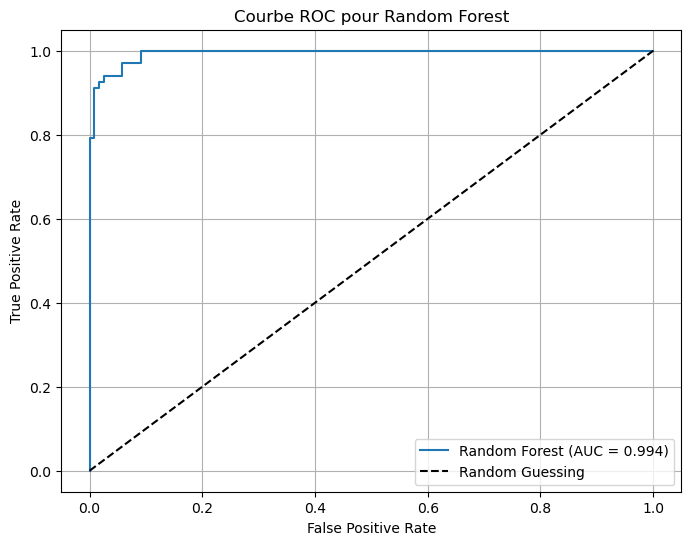

In [35]:
# Calculation of predicted probabilities for the positive class (malignant tumour).
rf_probs = PipelineLR.predict_proba(x_test)[:, 1]
# Calculation of the AUC-ROC score (Area Under the Curve - Receiver Operating Characteristic). 
# This score measures the model's ability to distinguish between positive and negative classes. 
# A value close to 1 indicates excellent separation.
rf_roc_auc = roc_auc_score(y_test, rf_probs)
print(f"ROC-AUC pour Random Forest: {rf_roc_auc:.3f}")

# Calculation of the False Positive Rate (FPR) and True Positive Rate (TPR).
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# ROC curve plot.
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_roc_auc:.3f})")
# Plot of the reference diagonal, representing a random prediction.
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  
plt.title("Courbe ROC pour Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

The ROC curve rises rapidly towards the upper left corner (near FPR = 0, TPR = 1), indicating an excellent balance between detecting malignant tumours and avoiding false positives.
A curve close to the upper left-hand corner indicates a well-performing model.

An AUC close to 1 means that the model has an excellent ability to separate positive (malignant) and negative (benign) classes.
An AUC of 0.994 therefore shows that the model performs very well, with little overlap between the predictions of the two classes.

### Comparison of ROC curves and AUC scores: Random Forest vs Logistic Regression

ROC-AUC pour Logistic Regression: 0.984


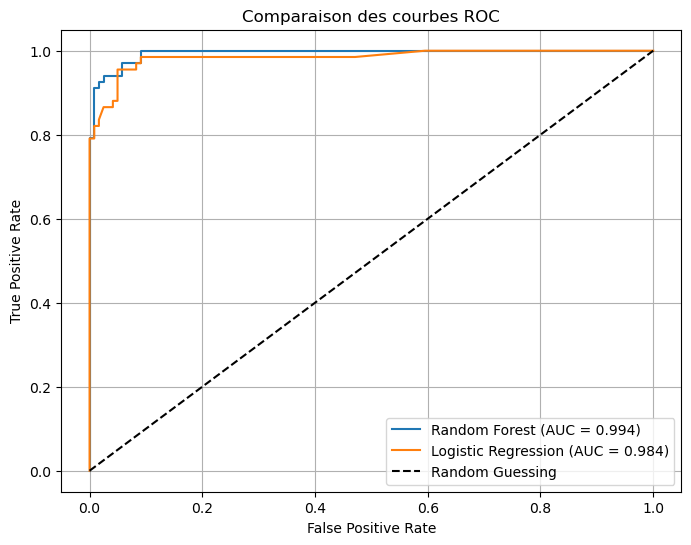

In [36]:
# Calculation of the predicted probabilities for the positive class (malignant tumours) using the logistic regression model.
lr_probs = Pipeline.predict_proba(x_test)[:, 1]
# Calculation of the AUC-ROC score for logistic regression.
lr_roc_auc = roc_auc_score(y_test, lr_probs)
print(f"ROC-AUC pour Logistic Regression: {lr_roc_auc:.3f}")

# Calculation of the false positive rate (FPR) and true positive rate (TPR) to plot the ROC curve for logistic regression.
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Creation of the figure for comparing ROC curves.
plt.figure(figsize=(8, 6))
# Plot of the ROC curve for the Random Forest model.
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_roc_auc:.3f})")
# Plot of the ROC curve for the logistic regression model.
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_roc_auc:.3f})")
# Drawing of the diagonal line representing a random prediction. 
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.title("Comparaison des courbes ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

**AUC scores**  
**Random Forest: AUC = 0.994**  
Indicates an excellent ability of the model to distinguish between classes (benign and malignant).  
This score is very close to 1, indicating almost perfect separation of the classes.  
**Logistic regression: AUC = 0.984**  
Also performed very well, but slightly worse than Random Forest.  
This may indicate that Logistic Regression is slightly less effective at capturing non-linear or complex relationships between the explanatory variables and the target variable.  

**Visual analysis of ROC curves**  
**Random Forest:**  
The Random Forest ROC curve is slightly higher than the Logistic Regression curve at most points.  
It remains very close to the upper left-hand corner (FPR = 0, TPR = 1), reflecting an excellent compromise between the true positive rate and the false positive rate.  
**Logistic regression:**  
The Logistic Regression curve also performs very well, but shows a slight inferiority to Random Forest in some FPR ranges.  
This reflects the robustness of the model, but it may perform slightly less well in scenarios where the classification thresholds are critical.

**Comparison of models**  
Advantages of Random Forest:  
With a slightly higher AUC, Random Forest is able to capture more complex relationships between explanatory variables.  
It handles non-linear interactions and noisy data better, giving it a slight advantage over Logistic Regression.